<a href="https://colab.research.google.com/github/nicolassalomon96/aprendizaje_maquina_UNS/blob/master/TP3/KNN-3.2(opcional).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 - Clasificador KNN

### Ejercicio 3.2 (optativo): Hacer alguna experiencia con el dataset anterior utilizando validáción cruzada y (o) grid search.

## 1. Librerias necesarias

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

## 2. Generación de los datasets

In [2]:
def gen_dataset(media_a, ds_a, media_b, ds_b, features_number, n):
  # Semilla aletoria
  np.random.seed(0)

  a_df = pd.DataFrame(np.random.normal(loc = media_a, scale = ds_a, size=(n, features_number)),
                          columns=['X','Y'])
  a_df['Etiqueta'] = 'A'

  b_df = pd.DataFrame(np.random.normal(loc = media_b, scale = ds_b, size=(n, features_number)),
                          columns=['X','Y'])
  b_df['Etiqueta'] = 'B'

  return a_df, b_df

def merge_dataset(a_df, b_df):
  a_b_df = pd.DataFrame(np.concatenate([a_df['X'],b_df['X']]), columns=['X'])
  a_b_df['Y'] = np.concatenate([a_df['Y'],b_df['Y']])
  a_b_df['Etiqueta'] = np.concatenate([a_df['Etiqueta'],b_df['Etiqueta']])
  a_b_df = a_b_df.sort_values(by='Y') #Ordenamos el dataset de menor a mayor
  a_b_df = a_b_df.reset_index().drop('index', axis=1) #Reseteamos los indices del dataset ordenado y eliminamos la columna index que posee los indices anteriores al ordenamiento
  
  return a_b_df

In [3]:
features_number = 2
n = 100

media_a = 10 #Media del dataset A
ds_a = 2  #Desviación estandar del dataset A

media_b = 15 #Media del dataset B
ds_b = 3 #Desviación estandar del dataset B

a_df, b_df = gen_dataset(media_a, ds_a, media_b, ds_b, features_number, n)

In [4]:
a_df

,X,Y,Etiqueta
0,13.528105,10.800314,A
1,11.957476,14.481786,A
2,13.735116,8.045444,A
3,11.900177,9.697286,A
4,9.793562,10.821197,A
...,...,...,...
95,7.414286,10.534102,A
96,9.921434,7.663813,A
97,11.046553,9.656907,A
98,11.543581,11.647008,A


### 2.1. Gráfica de datos

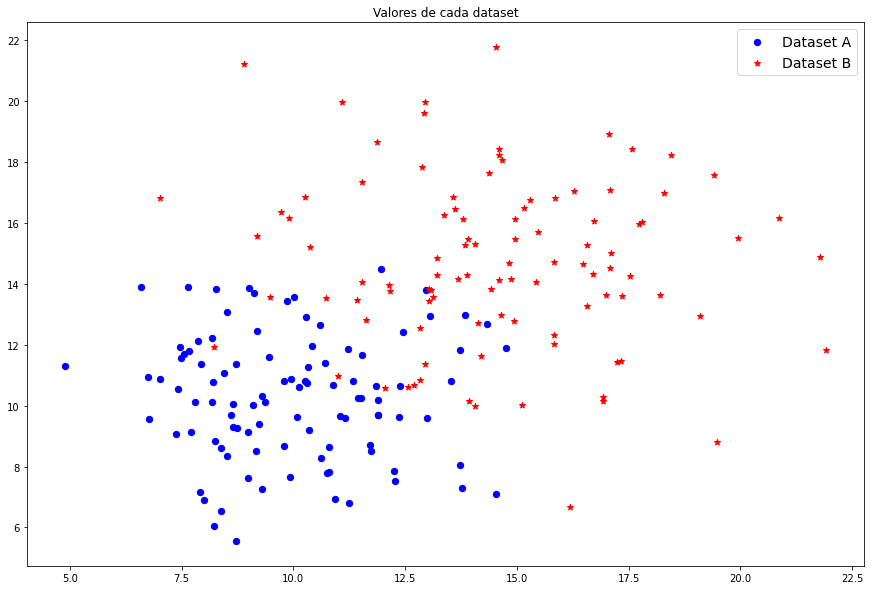

In [5]:
plt.figure(figsize=(15,10))
plt.scatter(a_df['X'], a_df['Y'], s=40, c='blue', label='Dataset A')
plt.scatter(b_df['X'], b_df['Y'], s=40, c='red', marker='*', label='Dataset B')
plt.title("Valores de cada dataset")
plt.legend(fontsize=14)
plt.show()

## 3. Clasificador K-NN 

In [86]:
#Separamos los datos de cada dataset en datos de prueba y validación
p_train = 0.5 #Porcentaje de datos de cada dataset utilizado para entrenamiento, el resto será para validación
a_train, a_test = train_test_split(a_df, train_size = p_train)
b_train, b_test = train_test_split(b_df, train_size = p_train)

print("Ejemplos usados para entrenar (Dataset A): ", len(a_train))
print("Ejemplos usados para test (Dataset A): ", len(a_test))
print("Ejemplos usados para entrenar (Dataset B): ", len(b_train))
print("Ejemplos usados para test (Dataset B): ", len(b_test))

Ejemplos usados para entrenar (Dataset A):  50
Ejemplos usados para test (Dataset A):  50
Ejemplos usados para entrenar (Dataset B):  50
Ejemplos usados para test (Dataset B):  50


In [87]:
train_dataset = merge_dataset(a_train, b_train)
X_train = train_dataset.iloc[:,:2]
y_train = train_dataset.iloc[:,2]

test_dataset = merge_dataset(a_test, b_test)
X_test = test_dataset.iloc[:,:2]
y_test = test_dataset.iloc[:,2]

### 3.1. Comparación emplenado cross-validation

In [92]:
k = 10 #nº de vecinos mas cercanos
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#Predicción sin cross-validation
y_predicted = knn.predict(X_test)

print("Metricas de medición sin cross-validation:")
print(f"{metrics.classification_report(y_test, y_predicted)}")

#Predicción con cross-validation
y_predicted_cross = cross_val_predict(knn, X_test, y_test, cv=10)

print("Metricas de medición con cross-validation:")
print(f"{metrics.classification_report(y_test, y_predicted_cross)}")

Metricas de medición sin cross-validation:
              precision    recall  f1-score   support

           A       0.84      0.92      0.88        50
           B       0.91      0.82      0.86        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

Metricas de medición con cross-validation:
              precision    recall  f1-score   support

           A       0.85      0.92      0.88        50
           B       0.91      0.84      0.87        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



Conclusión: Es posible observar como empleando cross-validation (con 10 repeticiones o pliegues) se obtiene una leve mejora en las métricas de medición para nuestros datasets. Por otro lado, es necesario destacar que en datasets mas extensos hay que analizar la capacidad de cómputo con que disponemos, dado que la validación cruzada requiere muchos mas cálculos y tiempo a emplear.